In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
from matplotlib.ticker import FuncFormatter

numeric_dtypes = [
    np.int8, np.int16, np.int32, np.int64,
    np.uint8, np.uint16, np.uint32, np.uint64,
    np.float16, np.float32, np.float64,
    np.complex64, np.complex128
]

## Import csv data

In [2]:
df_og_games = pd.read_csv("F:/Python/Project/1/Games_2024/games_may2024_cleaned/games_may2024_cleaned.csv",parse_dates=['release_date'])

## Creating a Copy of the DataFrame

- To ensure that the original dataset (`df_og_games`) remains unaffected while performing certain operations, we will create a copy of the DataFrame. This allows us to work with the copy independently without modifying the original data.

In [3]:
df = df_og_games.copy()

## Checking for Missing Values in Integer Columns
- If Missing Value exists we are droping it.

In [4]:
numeric_only = df.select_dtypes(include=numeric_dtypes)
numeric_only.isna().sum().sort_values(ascending=False)
column_to_drop='score_rank'
if column_to_drop in df.columns: df = df.drop(columns=column_to_drop)
numeric_only.isna().sum().sort_values(ascending=False)

score_rank                  83605
AppID                           0
average_playtime_forever        0
pct_pos_recent                  0
num_reviews_total               0
pct_pos_total                   0
peak_ccu                        0
median_playtime_2weeks          0
median_playtime_forever         0
average_playtime_2weeks         0
negative                        0
required_age                    0
positive                        0
user_score                      0
recommendations                 0
achievements                    0
metacritic_score                0
dlc_count                       0
price                           0
num_reviews_recent              0
dtype: int64

## Creating a New Column Named `year`

In [5]:
df['year_release_date'] = df['release_date'].dt.year

In [6]:
df['year_release_date'].value_counts()

year_release_date
2023    14224
2022    11837
2021    10656
2020     8921
2018     7495
2019     7354
2024     6912
2017     6013
2016     4190
2015     2538
2014     1538
2013      467
2012      324
2009      317
2011      260
2010      254
2008      160
2007       91
2006       68
2004        6
2005        6
2001        4
2003        3
2000        2
1999        2
1997        2
1998        1
2002        1
Name: count, dtype: int64

## Release Count Trends with Surge Period Highlight

 - This plot displays the release count trends across all years, with a focus on the surge period from 2013 to 2015. The overall trend is shown in blue, while the surge period is highlighted in yellow with a detailed breakdown in red. Annotations indicate the start and end of the surge period.

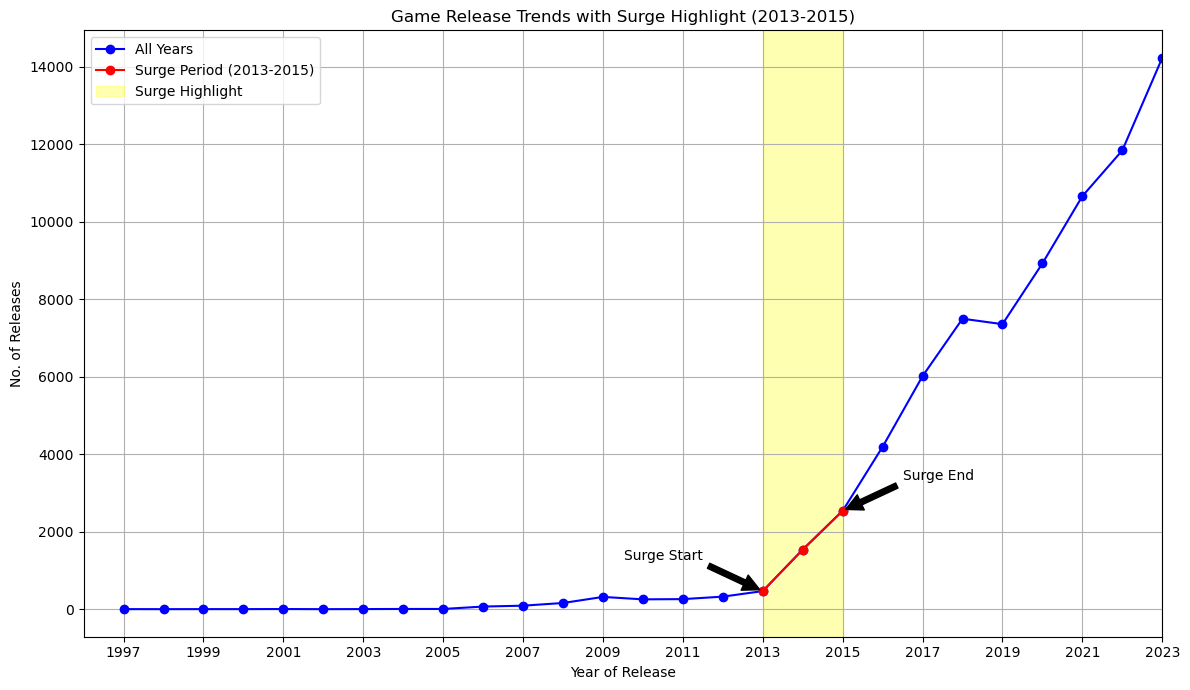

In [7]:
# Define cutoff year and surge period
cutoff_year = 2015
surge_start = 2013
surge_end = 2015

# Filter data for all years
all_counts = df['year_release_date'].value_counts().sort_index().reset_index()
all_counts.columns = ['year_release_date', 'count']

# Filter data for the surge period
surge_counts = df[(df['year_release_date'] >= surge_start) & (df['year_release_date'] <= surge_end)]
surge_counts = surge_counts['year_release_date'].value_counts().sort_index().reset_index()
surge_counts.columns = ['year_release_date', 'count']

# Plotting
plt.figure(figsize=(12, 7))

# Plot for all years
plt.plot(all_counts['year_release_date'], all_counts['count'], marker='o', linestyle='-', color='blue', label='All Years')

# Highlight the surge period with a shaded background and different line style
plt.plot(surge_counts['year_release_date'], surge_counts['count'], marker='o', linestyle='-', color='red', label='Surge Period (2013-2015)')
plt.axvspan(surge_start, surge_end, color='yellow', alpha=0.3, label='Surge Highlight')

# Add annotations with adjusted positions to avoid overlap
plt.annotate('Surge Start', xy=(surge_start, surge_counts['count'].min()), 
             xytext=(surge_start - 1.5, surge_counts['count'].min() + 800),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='right')

plt.annotate('Surge End', xy=(surge_end, surge_counts['count'].max()), 
             xytext=(surge_end + 1.5, surge_counts['count'].max() + 800),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='left')

# Set x-axis ticks to every 2 years
plt.xticks(range(min(df['year_release_date']), max(df['year_release_date']) + 1, 2))

# Labels and title
plt.xlabel('Year of Release')
plt.ylabel('No. of Releases')
plt.title('Game Release Trends with Surge Highlight (2013-2015)')
plt.legend()
plt.grid(True)
plt.xlim(min(df['year_release_date'])-1,max(df['year_release_date'])-1)

# # Show plot
plt.tight_layout()
plt.show() 

## Number of Releases by Operating System (Through 2023)
### A chart displaying the count of game releases categorized by operating system up to the year 2023.

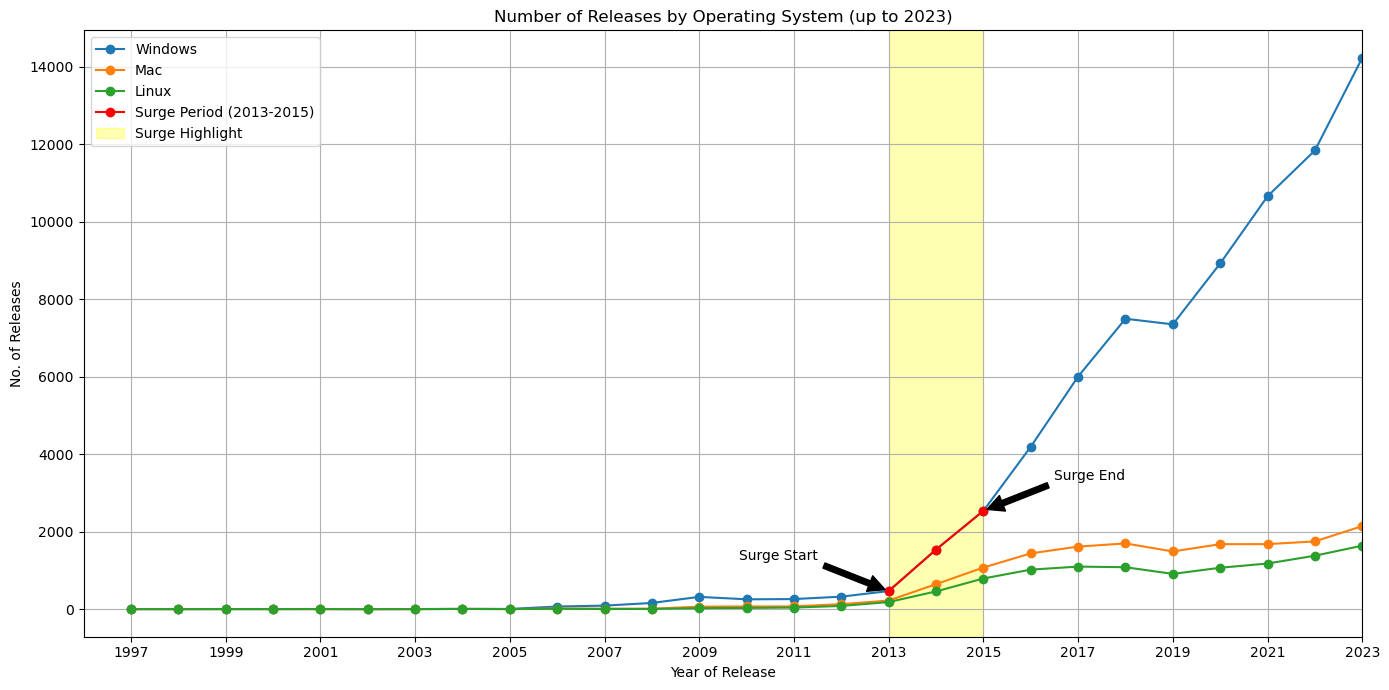

In [8]:

# Pivot tables for each OS 
dfw_pivot = df.pivot_table(values='windows', index='year_release_date', aggfunc='sum')
dfm_pivot = df.pivot_table(values='mac', index='year_release_date', aggfunc='sum')
dfl_pivot = df.pivot_table(values='linux', index='year_release_date', aggfunc='sum')

# Plotting
plt.figure(figsize=(14, 7))

# Plot for Windows
plt.plot(dfw_pivot, marker='o', linestyle='-', label='Windows')

# Plot for Mac
plt.plot(dfm_pivot, marker='o', linestyle='-', label='Mac')

# Plot for Linux
plt.plot(dfl_pivot, marker='o', linestyle='-', label='Linux')


# Highlight the surge period with a shaded background and different line style
plt.plot(surge_counts['year_release_date'], surge_counts['count'], marker='o', linestyle='-', color='red', label='Surge Period (2013-2015)')
plt.axvspan(surge_start, surge_end, color='yellow', alpha=0.3, label='Surge Highlight')

# Add annotations with adjusted positions to avoid overlap
plt.annotate('Surge Start', xy=(surge_start, surge_counts['count'].min()), 
             xytext=(surge_start - 1.5, surge_counts['count'].min() + 800),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='right')

plt.annotate('Surge End', xy=(surge_end, surge_counts['count'].max()), 
             xytext=(surge_end + 1.5, surge_counts['count'].max() + 800),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='left')


# Labels and title
plt.xlabel('Year of Release')
plt.ylabel('No. of Releases')
plt.title('Number of Releases by Operating System (up to 2023)')
plt.grid(True)
plt.xlim(min(df['year_release_date'])-1,max(df['year_release_date'])-1)
plt.xticks(range(min(df['year_release_date']),max(df['year_release_date'])+1,2))
plt.legend()
# Show plot
plt.tight_layout()
plt.show()

## Top 5 Developers Creating Multi-Platform Games by Total Price
### A chart showing the leading developers based on the total price of their games across all platforms.

In [9]:
df['developers'] = df['developers'].apply(lambda x:ast.literal_eval(x))

In [10]:
type(df['developers'][0])

list

In [11]:
developers_df = df.explode('developers')

In [12]:
df_devel_pivot = developers_df[['developers','windows','mac','linux','price']]

In [13]:
te = df_devel_pivot[(df_devel_pivot['windows']==True) & (df_devel_pivot['mac']==True) & (df_devel_pivot['linux']==True)]

In [14]:
developers_by_price = te.groupby('developers')['price'].sum().sort_values(ascending=False).to_frame()

In [15]:
developers_by_price = developers_by_price.head()
developers_by_price

,price
developers,
Hede,4899.39
Top-Down Games,2009.65
PUZZLE Games,1629.81
Aztech,1319.86
Choice of Games,1039.37


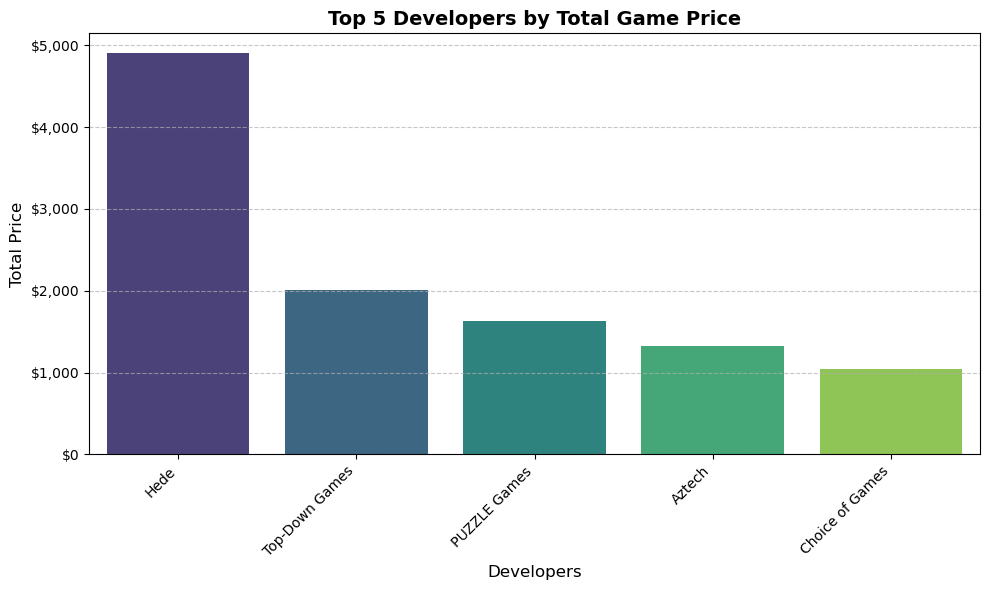

In [16]:
# Custom formatter function
def currency_formatter(x, _):
    return f'${x:,.0f}'

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=developers_by_price, x='developers', y='price', palette='viridis', hue='developers', legend=False)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Customizing the plot
plt.xlabel('Developers', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.title('Top 5 Developers by Total Game Price', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 5 Genres by Recommendation Percentage
### A chart displaying genres with the highest percentage of recommendations from players and critics.

In [17]:
df['genres'] = df['genres'].apply(lambda x:ast.literal_eval(x))

In [18]:
df_genre = df.explode('genres')

In [19]:
df_genre['genres'].value_counts()
dl=df_genre.groupby('genres')['recommendations'].count().sort_values(ascending=False).reset_index()

In [20]:
dl.columns=['genres','recommendations']

In [21]:
top_recommended_genres = dl.nlargest(10, 'recommendations')[['genres', 'recommendations']]
top_recommended_genres.sort_values(by='recommendations',ascending=False,inplace=True)
top_recommended_genres = top_recommended_genres.head()
total = top_recommended_genres.sum()['recommendations']

top_recommended_genres['recommendations_percent'] = 100*top_recommended_genres['recommendations']/total
top_recommended_genres

,genres,recommendations,recommendations_percent
0,Indie,58683,32.791493
1,Casual,35575,19.878966
2,Action,34763,19.425228
3,Adventure,33027,18.455168
4,Simulation,16910,9.449144


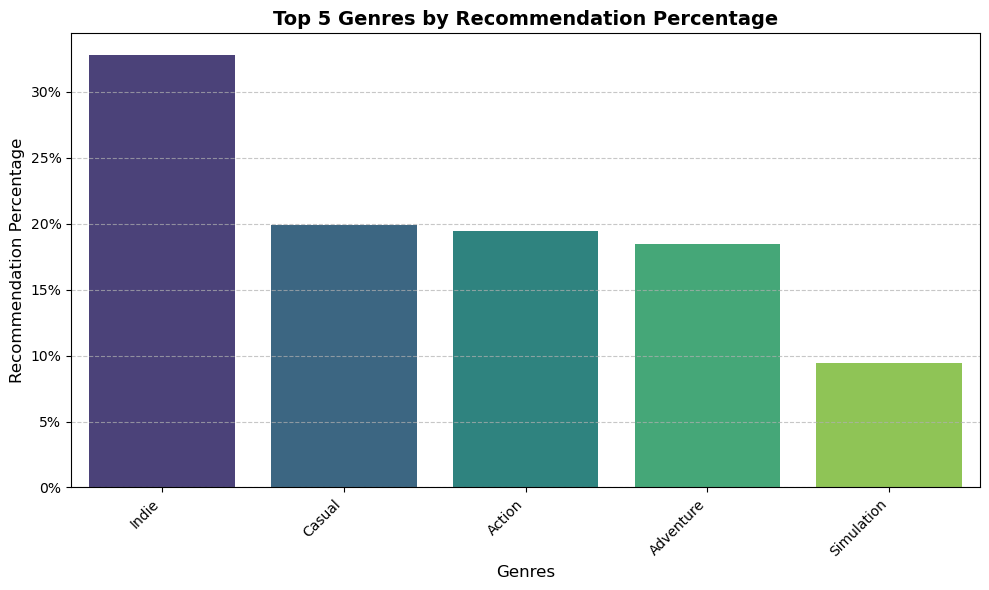

In [22]:
# Custom formatter function
def percy_formatter(x, _):
    return f'{x:,.0f}%'

plt.figure(figsize=(10, 6))
sns.barplot(data=top_recommended_genres,x='genres',y='recommendations_percent', palette='viridis', hue='genres', legend=False)
    
# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percy_formatter))

# Customizing the plot
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Recommendation Percentage', fontsize=12)
plt.title('Top 5 Genres by Recommendation Percentage', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 5 Games with Peak Concurrent Users and High Recommendations
### A chart showcasing games that not only have the highest peak concurrent users but are also highly recommended.

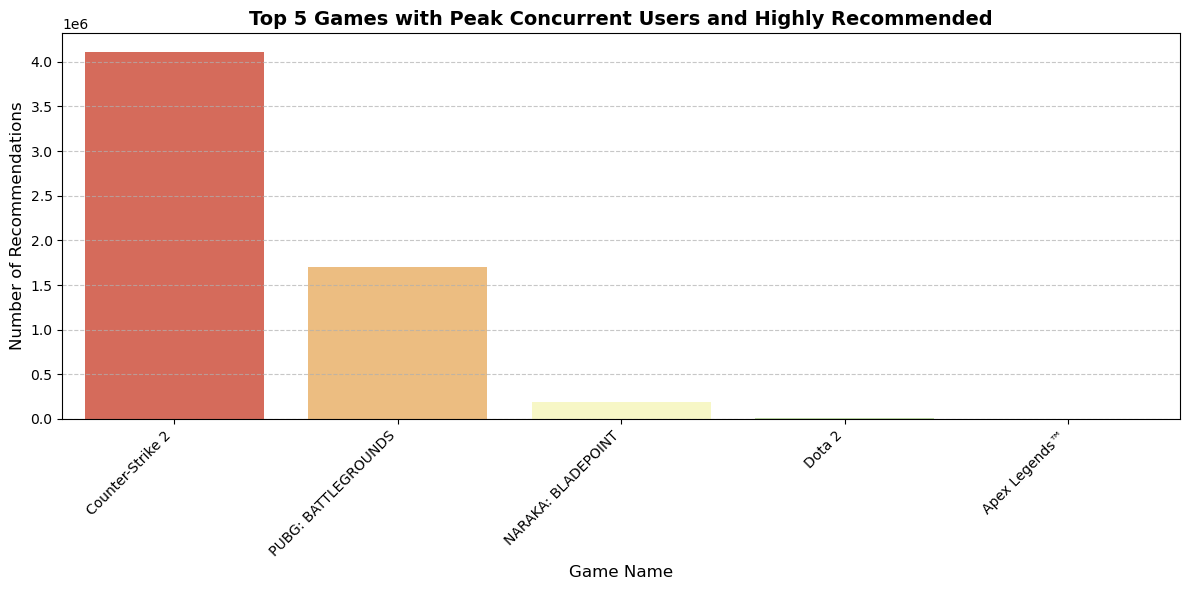

In [23]:
# Get the top 5 games with the highest peak CCU
top_peak_ccu_games = df.nlargest(5, 'peak_ccu')[['name', 'recommendations', 'peak_ccu']]

# Sort by recommendations in descending order
top_peak_ccu_games.sort_values(by='recommendations', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=[12, 6])

# Create the barplot-coolwarm
sns.barplot(data=top_peak_ccu_games, x='name', y='recommendations', palette='Spectral',hue='name',legend=False)

# Customize plot
plt.xlabel('Game Name', fontsize=12)
plt.ylabel('Number of Recommendations', fontsize=12)
plt.title('Top 5 Games with Peak Concurrent Users and Highly Recommended', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Top 5 Games by Number of Recommendations
### A chart highlighting games that may not be played frequently but are highly recommended by critics and players.

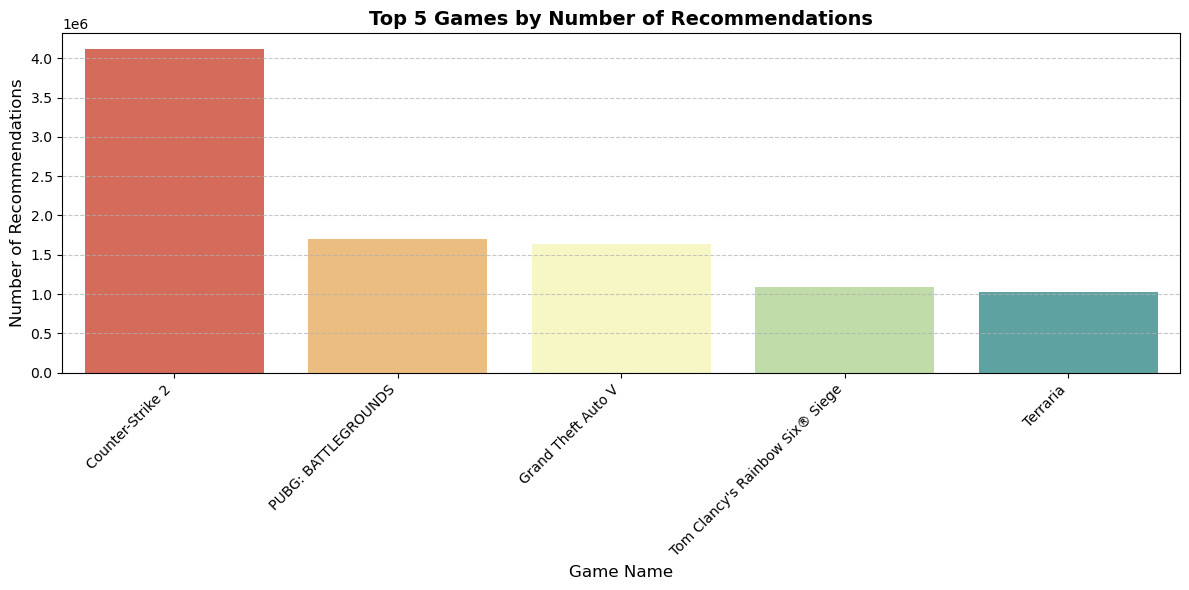

In [24]:
# Get the top 5 games by recommendations
top_recommended_games = df.nlargest(5, 'recommendations')[['name', 'recommendations']]

# Sort by recommendations in descending order
top_recommended_games = top_recommended_games.sort_values(by='recommendations', ascending=False)

# Plotting
plt.figure(figsize=[12, 6])

# Create the barplot with 'Spectral' palette
sns.barplot(data=top_recommended_games, x='name', y='recommendations', palette='Spectral', hue='name', legend=False)

# Customize plot
plt.xlabel('Game Name', fontsize=12)
plt.ylabel('Number of Recommendations', fontsize=12)
plt.title('Top 5 Games by Number of Recommendations', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Dummy

In [25]:
#Tuto purpose only.
# # Get the top 5 games by recommendations
# top_recommended_games = df.nlargest(5, 'recommendations')[['name', 'recommendations']]

# # Sort by recommendations in descending order
# top_recommended_games = top_recommended_games.sort_values(by='recommendations', ascending=False)

# # Plotting
# plt.figure(figsize=[12, 7])

# # Create the bar plot
# sns.barplot(data=top_recommended_games, x='name', y='recommendations', palette='viridis',hue='name',legend=False)

# # Customize plot
# plt.xlabel('Game Name', fontsize=14)
# plt.ylabel('Number of Recommendations', fontsize=14)
# plt.title('Top 5 Games by Number of Recommendations', fontsize=16, fontweight='bold')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Optional: Add data labels on the bars
# for index, (column,row) in enumerate(top_recommended_games.iterrows()):
#     plt.text(index, row['recommendations'] + 50, f'{row["recommendations"]:,}', 
#              ha='center', va='bottom', fontsize=12)

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()

## Top 5 Languages Featuring the Most Games
### This shows the five languages with the most available games, highlighting key markets for game distribution.

In [26]:
df['supported_languages'] = df['supported_languages'].apply(lambda x:ast.literal_eval(x))

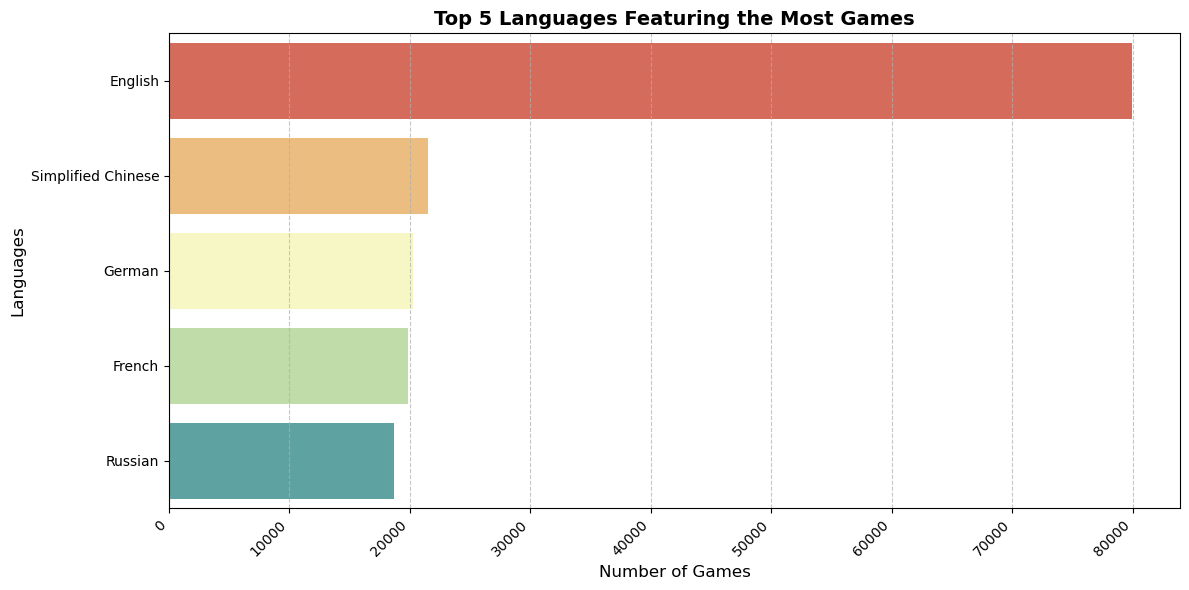

In [27]:
# Explode the supported_languages column to get a row for each language
df_exploded = df.explode('supported_languages')

# Count the number of games that support each language
language_counts = df_exploded['supported_languages'].value_counts()

# Get the top 5 languages
top_languages = language_counts.head(5).reset_index()
top_languages.columns = ['language', 'number_of_games']

# Plotting
plt.figure(figsize=[12, 6])

# Create the barplot with 'Spectral' palette
sns.barplot(data=top_languages, x='number_of_games', y='language', palette='Spectral', hue='language', legend=False)

# Customize plot
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Languages', fontsize=12)
plt.title('Top 5 Languages Featuring the Most Games', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()